<p>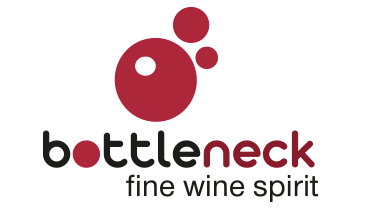</p>

<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p style="text-align: justify;"><span style="font-family: Calibri, sans-serif; font-size: 22px;"><strong>Contexte</strong></span></p>
        <p style="text-align: justify;"><span style="font-family: Calibri, sans-serif; font-size: 16px;">La soci&eacute;t&eacute; BottleNeck Wine Spirit souhaite d&eacute;velopper la gestion de ses ressources et am&eacute;liorer sa visibilit&eacute; sur l&apos;analyse de ses ventes web</span></p>

<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p style="text-align: justify;"><span style="font-family: Calibri, sans-serif; font-size: 22px;"><strong>Sommaire</strong></span></p><br>
        
<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p style="text-align: justify;"><span style="font-family: Calibri, sans-serif; font-size: 16px;">
1. Importation des données<br>
2. Nettoyage et traitement des données<br>
3. Rapprochement des fichiers<br>
4. Analyse du chiffre d'affaires<br>
5. Analyse et visualisation des prix de vente</span></p><br>

------------
<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p id="isPasted" style="text-align: lest;"><strong></strong><span style="font-family: Calibri, sans-serif;"><strong></strong><span style="font-size: 22px;"><strong>1. Importation des&nbsp;</strong></span><strong></strong><span style="font-size: 22px; color: rgb(184, 49, 47);"><strong>ressources</strong></span></span></p>
    </div>
</div></span></p>

------------

<div class="alert alert-block alert-info">
<b>Note :</b> Création d'un environnement avec les différentes librairies et fichiers nécessaires au projet. 
</div>

In [1]:
# import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
# import des .csv
erp = pd.read_csv('erp.csv', sep=';',decimal=',')
web = pd.read_csv('web.csv', sep=';', parse_dates=[9,10,19,20], decimal=',')
liaison = pd.read_csv('liaison.csv', sep=';', decimal=',')

------------
<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p id="isPasted" style="text-align: lest;"><strong></strong><span style="font-family: Calibri, sans-serif;"><strong></strong><span style="font-size: 22px;"><strong>2. Nettoyage et traitement&nbsp;</strong></span><strong></strong><span style="font-size: 22px; color: rgb(184, 49, 47);"><strong>des donn&eacute;es</strong></span></span></p>
    </div>
</div>

------------

<div class="text_cell_render rendered_html">
    <div class="text_cell_render rendered_html">
        <p><span style="font-family: Calibri, sans-serif; font-size: 16px;">La premi&egrave;re &eacute;tape consiste &agrave; traiter, nettoyer et analyser les exports de BottleNeck.</span><span style="font-family: Calibri, sans-serif;">&nbsp;</span></p>
        <p><span style="font-family: Calibri, sans-serif; font-size: 16px;">Pour se faire nous allons : &nbsp; &nbsp;</span><span style="font-family: Calibri, sans-serif;">&nbsp; &nbsp; &nbsp; &nbsp;</span></p>
        <ul>
            <li style="font-size: 16px; font-family: Calibri, sans-serif;">Afficher le type d&apos;informations donn&eacute;es dans chaque fichier (qualitatif, quantitatif, temporel...) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;</li>
            <li style="font-size: 16px; font-family: Calibri, sans-serif;">Rechercher le nombre de valeurs obtenues pour chaque caract&eacute;ristiques<ul style='font-family:"initial";'>
                    <li style="font-size: 16px; font-family: Calibri, sans-serif;">Colonnes &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;</li>
                    <li style="font-size: 16px; font-family: Calibri, sans-serif;">Lignes, lignes dupliqu&eacute;es &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;</li>
                    <li style="font-size: 16px; font-family: Calibri, sans-serif;">Nombre de valeurs manquantes &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;</li>
                </ul>
            </li>
            <li style="font-size: 16px; font-family: Calibri, sans-serif;">Analyser la cl&eacute; primaire de chaque export pour calculer la r&eacute;p&eacute;tition et la fr&eacute;quence d&apos;apparition de ces derni&egrave;res</li>
        </ul>
    </div>
</div>
<p><span style="font-family: Calibri, sans-serif; font-size: 16px;">Chaque export sera ensuite nettoy&eacute; individuellement afin de rendre la version la plus exploitable de chacun.</span></p>

<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p style="text-align: left;"><span id="isPasted" style="font-family: Calibri, sans-serif;"><span style="font-size: 20px;"><strong>Export </strong></span><span style="color: rgb(184, 49, 47); font-size: 20px;"><strong>ERP</strong></span></span><span style="font-family: Calibri, sans-serif; font-size: 22px;"><strong><br></strong></span></p>
    </div>
</div>

<div class="alert alert-block alert-info">
<b>Note :</b> Analyse de la structure du fichier et des informations contenues.
</div>

In [3]:
# Affichage informations DatFrame "ERP"
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [4]:
# Affichage du nombre de colonnes
print('Nombre de colonnes:',erp.shape[1])

# Affichage du nombre de lignes
print('Nombre de lignes:',erp.shape[0],'\n')
# print('Nombre de lignes:', len(web)) 

# Identification du nombre de lignes en doublon
print('Nombre de lignes dupliquées:',erp.duplicated().sum())

# Nombre de valeurs manquantes
print('Nombre de valeurs manquantes:',(erp.isnull().sum().sum()),'\n')

# Nombre de valeurs manquantes de l'ID ['product_id']
print('Valeurs manquantes (product_id):',(erp[['product_id']].isnull().sum().sum()))

# Tri des valeurs de l'ID ['product_id'] (croissant)
erp = erp.sort_values('product_id')

Nombre de colonnes: 5
Nombre de lignes: 825 

Nombre de lignes dupliquées: 0
Nombre de valeurs manquantes: 0 

Valeurs manquantes (product_id): 0


<div class="alert alert-block alert-info">
<b>Note :</b> Analyse des effectifs et des répétitions de l'ID du fichier
</div>

In [5]:
## ANALYSE DE L'ID ['product_id'] ##

# Calcul du nombre de repetition
df_erp = erp['product_id'].value_counts()

# Modalités de l'index "df"
modalites = df_erp.index

# Création du tableau à partir des modalités
tab = pd.DataFrame(modalites, columns = ['product_id']) 
tab['n'] = df_erp.values

# Len(web) renvoie la taille de l'échantillon
tab['f'] = tab['n'] / len(df_erp)

# Tri des valeurs de la variable X (croissant)
tab = tab.sort_values('product_id') 

# Cumsum calcule la somme cumulée
tab['F'] = tab['f'].cumsum()

# Affichage tableau
tab.head()

,product_id,n,f,F
381,3847,1,0.001212,0.001212
383,3849,1,0.001212,0.002424
384,3850,1,0.001212,0.003636
230,4032,1,0.001212,0.004848
257,4039,1,0.001212,0.006061


<div class="alert alert-block alert-warning">
<b>Conclusion :</b><br>    
- Aucune anomalie<br>
- Aucun doublons<br>
- Chaque <b>product_id</b> est unique   
</div>

<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p style="text-align: left;"><span id="isPasted" style="font-family: Calibri, sans-serif;"><span style="font-size: 20px;"><strong>Export </strong></span><span style="color: rgb(184, 49, 47); font-size: 20px;"><strong>web</strong></span></span><span style="font-family: Calibri, sans-serif; font-size: 22px;"><strong><br></strong></span></p>
    </div>
</div>

<div class="alert alert-block alert-info">
<b>Note :</b> Analyse de la structure du fichier et des informations contenues.
</div>

In [6]:
# Affichage informations DatFrame "web"
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [7]:
## AFFICHAGE ET TRI ##

# Affichage du nombre de colonnes
print('Nombre de colonnes:',web.shape[1])

# Affichage du nombre de lignes
print('Nombre de lignes:',web.shape[0],'\n')
# print('Nombre de lignes:', len(web)) 

# Identification du nombres de lignes en doublons du DataFrame "web"
print('Nombre de lignes dupliquées:',web.duplicated().sum())

# Nombre total de valeurs manquantes du DataFrame
print('Nombre de valeurs manquantes:',(web.isnull().sum().sum()),'\n')

# Nombre total des valeurs manquantes de l'ID ['id_web']
print('Nombre de valeurs manquantes ID (sku):',(web[['sku']].isnull().sum().sum()))

Nombre de colonnes: 28
Nombre de lignes: 1513 

Nombre de lignes dupliquées: 82
Nombre de valeurs manquantes: 9941 

Nombre de valeurs manquantes ID (sku): 85


In [8]:
# Répartition des valeurs manquantes
print(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


<div class="alert alert-block alert-info">
<b>Note :</b> Analyse des effectifs et des répétitions de l'ID du fichier
</div>

In [9]:
## ANALYSE DE L'ID ['sku'] ##

# Calcul du nombre de repetition de sku
df_web = web['sku'].value_counts()

# Modalités de l'index "df"
modalites = df_web.index

# Création du tableau à partir des modalités
tab1 = pd.DataFrame(modalites, columns = ['sku']) 
tab1['n'] = df_web.values

# Len(web) renvoie la taille de l'échantillon
tab1['f'] = tab1['n'] / len(web)

# Tri des valeurs de la variable X (croissant)
tab1 = tab1.sort_values('sku') 

# Cumsum calcule la somme cumulée
tab1['F'] = tab1['f'].cumsum()

# Affichage tableau
tab1.head()

,sku,n,f,F
537,10014,2,0.001322,0.001322
109,10459,2,0.001322,0.002644
505,10775,2,0.001322,0.003966
205,10814,2,0.001322,0.005288
536,11049,2,0.001322,0.006609


<div class="alert alert-block alert-warning">
<b>NB :</b><br>    
- Duplication de plusieurs lignes<br>
- Répétitions multiples de l'attributs <b>id_web</b><br>
- Valeurs manquantes et disparates sur plusieurs colonne
</div>

<div class="alert alert-block alert-info">
<b>Note :</b> Traitement et nettoyage du fichier
</div>

In [10]:
## TRAITEMENT ET NETTOYAGE ##

# Renommage de l'ID ['id_web']
clean_web = web.rename(columns =
                 {'sku' : 'id_web'})

# Suppression des lignes complètement dupliquées
clean_web = clean_web.drop_duplicates()

# Suppression des lignes avec ['post_type'] == 'attachment'] en condition
clean_web.drop(clean_web[clean_web['post_type'] == 'attachment'].index, inplace=True)

# Tri des valeurs de 'id_web' (croissant)
clean_web = clean_web.sort_values('id_web')

# Affichage DataFrame
clean_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
628,10014,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
255,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
321,10775,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 21:28:52,...,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
281,10814,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 10:12:40,...,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
257,11049,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 16:07:49,...,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div class="alert alert-block alert-info">
<b>Note :</b> Analyse du nouveau fichier et des informations contenues.
</div>

In [11]:
## AFFICHAGE ET TRI DU NOUVEAU DATAFRAME ##

# Affichage du nombre de lignes
print('Nombre de lignes:',clean_web.shape[0])

# Identification du nombres de lignes en doublons du DataFrame "web"
print('Nombre de lignes dupliquées:',clean_web.duplicated().sum(),'\n')

# Affichage du nombre de colonnes
print('Nombre de colonnes:',clean_web.shape[1])

# Nombre du total des valeurs manquantes
print('Nombre de valeurs manquantes:',(clean_web.isnull().sum().sum()),'\n')

# Nombre du total des valeurs manquantes 'ID'
print('Nombre de valeurs manquantes (id_web):',(clean_web[['id_web']].isnull().sum().sum()))

Nombre de lignes: 717
Nombre de lignes dupliquées: 0 

Nombre de colonnes: 28
Nombre de valeurs manquantes: 3607 

Nombre de valeurs manquantes (id_web): 3


In [12]:
# Répartition des valeurs manquantes
print(clean_web.isnull().sum())

id_web                     3
virtual                    0
downloadable               0
rating_count               0
average_rating             1
total_sales                1
tax_status                 1
tax_class                717
post_author                1
post_date                  1
post_date_gmt              1
post_content             717
post_title                 1
post_excerpt               1
post_status                1
comment_status             1
ping_status                1
post_password            717
post_name                  1
post_modified              1
post_modified_gmt          1
post_content_filtered    717
post_parent                1
guid                       1
menu_order                 1
post_type                  1
post_mime_type           717
comment_count              1
dtype: int64


<div class="alert alert-block alert-info">
<b>Note :</b> Analyse des ID manquants
</div>

In [13]:
# Affichage des lignes ayant un ID 'id_web' nul
clean_web[clean_web['id_web'].isnull()]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [14]:
# Suppression des lignes de l'ID ['id_web'] nul
clean_web.dropna(subset=['id_web'], inplace=True)

In [15]:
# Téléchargement fichier 'clean_web'
clean_web.to_csv("clean_web.csv",index=False)

<div class="alert alert-block alert-warning">
<p style="text-align: justify;">
Le nettoyage a consisté à :<br>
- Renommer l'attribut <b>sku</b> en <b>id_web</b> pour permettre la liason avec le fichier <b>erp</b><br>
- Supprimer les lignes dupliquées<br>
- Suprimmer les lignes avec avec la condition <b>attachment</b> de la colonne <b>post_type</b><br>
- Supprimer les lignes n'ayant aucun <b>id_web</b> : Conserver ces lignes causerait de faux doublons lors de jointures avec d'autres fichiers.    
</div>

<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p style="text-align: left;"><span id="isPasted" style="font-family: Calibri, sans-serif;"><span style="font-size: 20px;"><strong>Fichier&nbsp;</strong></span><span style="color: rgb(184, 49, 47); font-size: 20px;"><strong>Liaison</strong></span></span><span style="font-family: Calibri, sans-serif; font-size: 22px;"><strong><br></strong></span></p>
    </div>
</div>

<div class="alert alert-block alert-info">
<b>Note :</b> Analyse de la structure du fichier et des informations contenues.
</div>

In [16]:
# Affichage informations DatFrame "web"
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [17]:
## AFFICHAGE ET TRI ##

# Affichage du nombre de colonnes
print('Nombre de colonnes:',liaison.shape[1])

# Affichage du nombre de lignes
print('Nombre de lignes:',liaison.shape[0],'\n')
# print('Nombre de lignes:', len(web)) 

# Identification du nombres de lignes en doublons du DataFrame "web"
print('Nombre de lignes dupliquées:',liaison.duplicated().sum())

# Identification du nombres de lignes en doublons du DataFrame "web"
print('Nombre de lignes product_id dupliquées:',liaison['product_id'].duplicated().sum())

# Nombre total de valeurs manquantes du DataFrame
print('Nombre de valeurs manquantes:',(liaison.isnull().sum().sum()),'\n')

# Nombre total des valeurs manquantes de l'ID ['product_id']
print('Nombre de valeurs manquantes ID (product_id):',(liaison[['product_id']].isnull().sum().sum()))

# Nombre total des valeurs manquantes de l'ID ['id_web']
print('Nombre de valeurs manquantes (id_web):',(liaison[['id_web']].isnull().sum().sum()))

Nombre de colonnes: 2
Nombre de lignes: 825 

Nombre de lignes dupliquées: 0
Nombre de lignes product_id dupliquées: 0
Nombre de valeurs manquantes: 91 

Nombre de valeurs manquantes ID (product_id): 0
Nombre de valeurs manquantes (id_web): 91


In [18]:
# Vérification de la répartition des valeurs manquantes
print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


<div class="alert alert-block alert-info">
<b>Note :</b> Analyse des effectifs et des répétitions des ID du fichier
</div>

In [19]:
## ANALYSE DE LA COLONNE ['id_web'] ##

# Calcul du nombre de repetition de l'id_web
df_liaison = liaison['id_web'].value_counts()

# Modalités de l'index "df"
modalites = df_liaison.index

# Création du tableau à partir des modalités
tab2 = pd.DataFrame(modalites, columns = ['id_web']) 
tab2['n'] = df_liaison.values

# Len(web) renvoie la taille de l'échantillon
tab2['f'] = tab2['n'] / len(df_liaison)

# Tri des valeurs de la variable X (croissant)
tab2 = tab2.sort_values('id_web') 

# Cumsum calcule la somme cumulée
tab2['F'] = tab2['f'].cumsum()

# Affichage tableau
tab2.head()

,id_web,n,f,F
551,10014,1,0.001362,0.001362
137,10459,1,0.001362,0.002725
520,10775,1,0.001362,0.004087
211,10814,1,0.001362,0.005450
550,11049,1,0.001362,0.006812


In [20]:
## ANALYSE DE LA COLONNE ['product_id'] ##

# Calcul du nombre de repetition de l'id_web
df_liaison = liaison['product_id'].value_counts()

# Modalités de l'index "df"
modalites = df_liaison.index

# Création du tableau à partir des modalités
tab3 = pd.DataFrame(modalites, columns = ['product_id']) 
tab3['n'] = df_liaison.values

# Len(web) renvoie la taille de l'échantillon
tab3['f'] = tab3['n'] / len(web)

# Tri des valeurs de la variable X (croissant)
tab3 = tab3.sort_values('product_id') 

# Cumsum calcule la somme cumulée
tab3['F'] = tab3['f'].cumsum()

# Affichage tableau
tab3.head()

,product_id,n,f,F
381,3847,1,0.000661,0.000661
383,3849,1,0.000661,0.001322
384,3850,1,0.000661,0.001983
230,4032,1,0.000661,0.002644
257,4039,1,0.000661,0.003305


<div class="alert alert-block alert-warning">
<b>Conclusion :</b><br>    
- Aucune anomalie<br>
- Aucun doublons<br>
- Chaque <b>id_web</b> est unique<br>
- 91 valeurs manquantes situées exclusivement sur l'<b>id_web</b>, ce qui signifie que pour ces éléments, il n'y a aucun référencement en ligne
</div>

------------
<div class="inner_cell">
    <div class="text_cell_render rendered_html">
        <p style="text-align: left;"><strong></strong><span style="font-family: Calibri, sans-serif;"><strong></strong><span style="font-size: 22px;"><strong>3. Rapprochement des&nbsp;</strong></span><strong></strong><span style="font-size: 22px; color: rgb(184, 49, 47);"><strong>fichiers</strong></span></span></p>
    </div>
</div>

------------

<p><span style="font-family: Calibri, sans-serif; font-size: 16px;">Le rapprochement des fichiers consiste &agrave; fusionner les exports pour analyser les donn&eacute;es contenues dans ces derniers.</span></p>
<p><span style="font-family: Calibri, sans-serif; font-size: 16px;">Pour cela, nous allons utiliser un fichier de liaison dans lequel sont r&eacute;pertori&eacute;es les informations des produits vendu en ligne avec leur correspondance sur l&apos;export ERP qui contient les r&eacute;f&eacute;rences de produits.</span></p>
<p><span style="font-family: Calibri, sans-serif; font-size: 16px;"><br></span></p>

<div class="alert alert-block alert-info">
<p style="text-align: justify;">
<b>Note :</b> Jointure externe entre les fichiers <b>liaison</b> et <b>erp</b> qui permet de conserver toutes les informations, même celles sans correspondances avec l'ajout d'une colonne "indicator" qui permet d'analyser sur quel(s) fichier(s) se situe chaque instance.
</div>

In [21]:
# Jointure entre les fichiers "liaison" et "erp" par l'attribut 'product_id'
liaison_erp_merge = liaison.merge(erp, how='outer', on='product_id', indicator='indicator')

# Téléchargement fichier 'erp_merge_liaison'
liaison_erp_merge.to_csv("liaison_erp_merge_indicator.csv",index=False)

# Affichage DataFrame
liaison_erp_merge.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,indicator
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both


In [22]:
# Résultat indicator
liaison_erp_merge['indicator'].value_counts()

both          825
left_only       0
right_only      0
Name: indicator, dtype: int64

In [23]:
## AFFICHAGE ET TRI ##

# Affichage du nombre d'ID de chaque fichier
print('Nombre ID "product_id" :', liaison_erp_merge['product_id'].value_counts().sum())
print('Nombre ID "id_web" :', liaison_erp_merge['id_web'].value_counts().sum(),'\n')

# Affichage du nombre de colonnes
print('Nombre de colonnes:',liaison_erp_merge.shape[1])

# Affichage du nombre de lignes
print('Nombre de lignes:',liaison_erp_merge.shape[0],'\n')
# print('Nombre de lignes:', len(web))

# Identification du nombres de lignes en doublons du DataFrame "web"
print('Nombre de lignes dupliquées:',liaison_erp_merge.duplicated().sum())

# Nombre total de valeurs manquantes du DataFrame
print('Nombre de valeurs manquantes:',(liaison_erp_merge.isnull().sum().sum()))

Nombre ID "product_id" : 825
Nombre ID "id_web" : 734 

Nombre de colonnes: 7
Nombre de lignes: 825 

Nombre de lignes dupliquées: 0
Nombre de valeurs manquantes: 91


<div class="alert alert-block alert-warning">
<p style="text-align: justify;">
<b>NB :</b> Pour cette jointure, une jointure interne aurait fait perdre les informations liées aux <b>id_web</b> manquants (91) du fichier <b>liaison</b>.
</div>

<div class="alert alert-block alert-info">
<p style="text-align: justify;">
<b>Note :</b> Jointure externe entre les fichiers <b>liaison_erp_merge</b> et <b>clean_web</b>.
</div>

In [24]:
#Jointure entre les fichiers "liaison_erp_merge" et "clean_web" par l'attribut 'id_web'
df_merge = liaison_erp_merge.merge(clean_web, how='outer', on='id_web', indicator='indicator2')

# Téléchargement fichier 'df_merge'
df_merge.to_csv("df_merge.csv",index=False)

#Affichage DataFrame
df_merge.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,indicator,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,indicator2
0,3847,15298,1,24.2,0,outofstock,both,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,both,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,both,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,both,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,both,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [25]:
## AFFICHAGE ET TRI ##

# Affichage du nombre d'ID de chaque fichier
print('Nombre ID "product_id" :', df_merge['product_id'].value_counts().sum())
print('Nombre ID "id_web" :', df_merge['id_web'].value_counts().sum(),'\n')

# Affichage du nombre de colonnes
print('Nombre de colonnes:',df_merge.shape[1])

# Affichage du nombre de lignes
print('Nombre de lignes:',df_merge.shape[0],'\n')
# print('Nombre de lignes:', len(web))

# Identification du nombres de lignes en doublons du DataFrame "web"
print('Nombre de lignes dupliquées:',df_merge.duplicated().sum())

# Nombre total de valeurs manquantes du DataFrame
print('Valeurs manquantes:',(df_merge.isnull().sum().sum()))

Nombre ID "product_id" : 825
Nombre ID "id_web" : 734 

Nombre de colonnes: 35
Nombre de lignes: 825 

Nombre de lignes dupliquées: 0
Valeurs manquantes: 6658


In [26]:
# Résultat indicator
df_merge['indicator2'].value_counts()

both          714
left_only     111
right_only      0
Name: indicator2, dtype: int64

In [27]:
# Vérification de la répartition des valeurs manquantes
print(df_merge.isnull().sum())

product_id                 0
id_web                    91
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
indicator                  0
virtual                  111
downloadable             111
rating_count             111
average_rating           111
total_sales              111
tax_status               111
tax_class                825
post_author              111
post_date                111
post_date_gmt            111
post_content             825
post_title               111
post_excerpt             111
post_status              111
comment_status           111
ping_status              111
post_password            825
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    825
post_parent              111
guid                     111
menu_order               111
post_type                111
post_mime_type           825
comment_count            111
indicator2    

<div class="alert alert-block alert-warning">
<b>Conclusion :</b><br>    
- Aucune anomalie<br>
- Aucun doublons<br>
- 111 valeurs ne correspondent pas entre les fichiers. En considérant que 91 valeurs sont déjà manquantes sur le fichier <b>clean_web</b> et que les valeurs manquantes se situent exclusivement sur ce fichier, cela nous indique que 20 références supplémentaires sont encore disponibles mais pas répertoriées sur le site web.
</div>

------------
<p style="text-align:left;"><strong></strong><span style="font-family: Calibri, sans-serif;"><strong></strong><span style="font-size: 22px;"><strong>4. Analyse du&nbsp;</strong></span><strong></strong><span style="font-size: 22px; color: rgb(184, 49, 47);"><strong>chiffre d&apos;affaires</strong></span></span></p>

------------

<p><span style="font-family: 'Arial Black', Gadget, sans-serif;">Résultat CA <span style="color: rgb(184, 49, 47);">en ligne</span></span></p>

<div class="alert alert-info">
<b>Note :</b> Calcul du chiffre d'affaire réalisé en ligne
</div>

In [28]:
#Chiffre d'affaires par produit
ca_products = df_merge.assign(total = (df_merge["total_sales"] * df_merge["price"]))

#Chiffre d'affaires global réalisé en ligne
ca_online = (ca_products['total']).sum()

#Affichage résultat
print("Le chiffre d’affaires réalisé en ligne est de", ca_online, "€")

#Téléchargement ca_products en format .csv
ca_products.to_csv("ca_products.csv",index=False)

Le chiffre d’affaires réalisé en ligne est de 70568.6 €


------------
<p style="text-align: left;"><span style="font-family:'Arial Black', Gadget, sans-serif;"><span style="font-size:18px;">5. Analyse et visualisation </span><span style="font-size:18px;color:rgb(184, 49, 47);">des prix de vente</span></span></p>

------------

<div class="alert alert-info">
<b>Note :</b> Recherche des valeurs atypiques par la méthode <b>Interquartile</b> et <b>Zscore</b>.
</div>

<p><span style="font-family: 'Arial Black', Gadget, sans-serif;">Interquartile <span style="color: rgb(184, 49, 47);">range (IQR)</span></span></p>

In [29]:
# Création d'une copie du DataFrame "df_merge"
df_iqr = df_merge.copy()

In [30]:
# Définition du calcul des centiles

def get_percentile(df, percentile_rank):
    
    # Tri croissant de "price" et réinitailisation des indices
    df = df.sort_values(by='price').reset_index()
    
    # Règle de trois pour obtenir l’indice de "price"
    index = (len(df.index)-1) * percentile_rank / 100.0
    index = int(index)
    
    # Renvoi de "price" correspondant au rang du centile
    return df.at[index, 'price']

In [31]:
#Affichage des centiles
print('p25= ',get_percentile(df_iqr, 25))
print('p75= ',get_percentile(df_iqr, 75))

p25=  14.6
p75=  42.0


In [32]:
# Définition du calcul de l'iqr

def interquartile_range(df):
    
    p75 = get_percentile(df, 75)  # 75th centiles
    p25 = get_percentile(df, 25)  # 25th centiles
    iqr = p75 - p25  # Interquartile Range
    return iqr

In [33]:
# Affichage iqr
iqr = interquartile_range(df_iqr)

iqr

# L'iqr peut aussi être calculer directement à partir d'une librairie "scipy.stats"
# iqr(df_iqr['price'])

27.4

In [34]:
def get_no_outliers(df):
    
    # Calcul du 25e centile, du 75e centile et de l'IQR
    p25 = get_percentile(df, 25)
    p75 = get_percentile(df, 75)
    iqr = interquartile_range(df)
    
    # "Valeur minimale non aberrante": 25th centile - 1.5 * IQR
    min_val = p25 - 1.5*iqr
    # "Valeur maximale non aberrante": 75th centile + 1.5 * IQR
    max_val = p75 + 1.5*iqr

    # Tout ce qui est inférieur au minimum ou supérieur au maximum devient une valeur aberrante
    no_outliers = df[(df['price'] > min_val) & (df['price'] < max_val)]
    return no_outliers

In [35]:
# DataFrame outliers IQR
no_outliers_iqr = get_no_outliers(df_iqr)

#Téléchargement outliers_IQR en format .csv
no_outliers_iqr.to_csv("no_outliers_iqr.csv",index=False)

no_outliers_iqr.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,indicator,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,indicator2
0,3847,15298,1,24.2,0,outofstock,both,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,both,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,both,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,both,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,both,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [36]:
# Affichage du nombre d'outliers'
print('Nombre de valeurs non aberrantes:',no_outliers_iqr.shape[0])

Nombre de valeurs non aberrantes: 788


In [37]:
def get_outliers(df):
    
    # Calcul du 25e centile, du 75e centile et de l'IQR
    p25 = get_percentile(df, 25)
    p75 = get_percentile(df, 75)
    iqr = interquartile_range(df)
    
    # "Valeur minimale non aberrante": 25th centile - 1.5 * IQR
    min_val = p25 - 1.5*iqr
    # "Valeur maximale non aberrante": 75th centile + 1.5 * IQR
    max_val = p75 + 1.5*iqr

    # Tout ce qui est inférieur au minimum ou supérieur au maximum devient une valeur aberrante
    outliers = df[(df['price'] < min_val) | (df['price'] > max_val)]
    return outliers

In [38]:
# DataFrame outliers IQR
outliers_iqr = get_outliers(df_iqr)

#Téléchargement outliers_IQR en format .csv
outliers_iqr.to_csv("outliers_iqr.csv",index=False)

outliers_iqr.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,indicator,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,indicator2
19,4055,NaN,0,86.1,0,outofstock,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
30,4594,NaN,1,144.0,0,outofstock,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
47,5070,NaN,1,84.7,0,outofstock,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
55,6324,NaN,0,92.0,18,instock,both,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
154,4115,15382,1,100.0,11,instock,both,0.0,0.0,0.0,...,2020-02-08 11:45:02,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [39]:
# Affichage du nombre d'outliers'
print('Nombre de valeurs aberrantes:',outliers_iqr.shape[0])

Nombre de valeurs aberrantes: 37


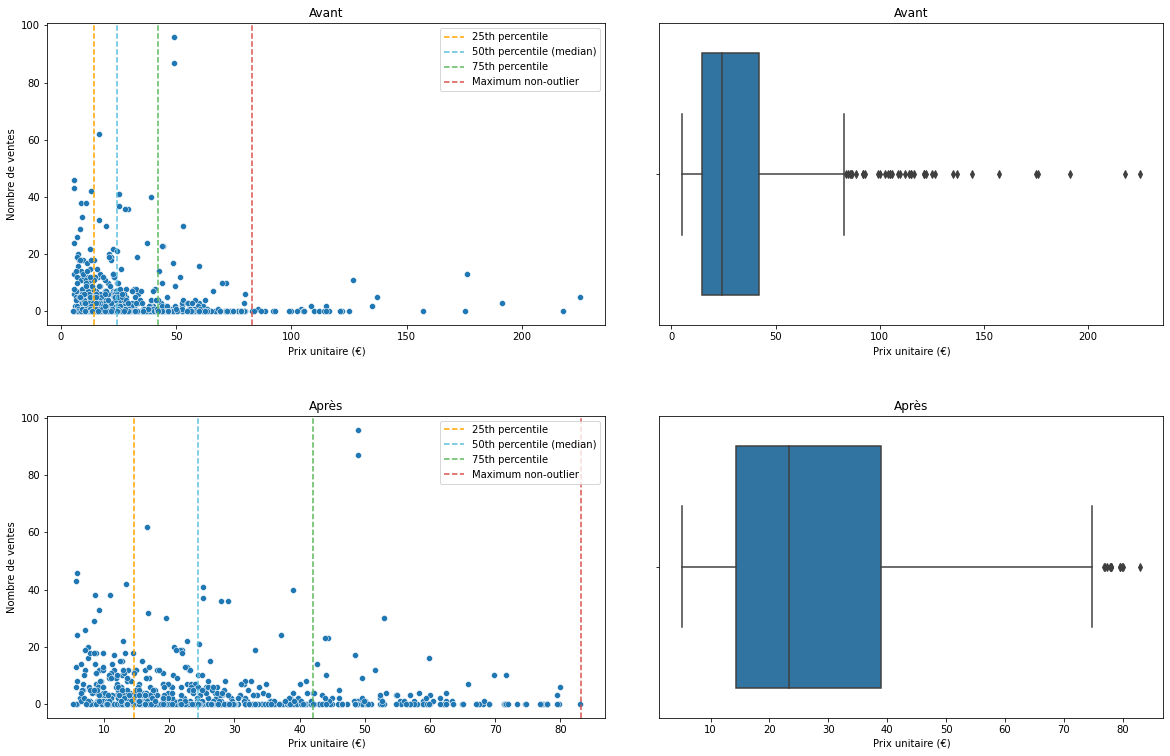

In [40]:
# Graphique iqr
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=5, 
                       figure=fig, 
                       width_ratios= [1, 1, 1, 1, 2],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)

# Figure 1
ax1 = fig.add_subplot(gs[0:1, 0:3])
sns.scatterplot(data=df_merge, x="price", y="total_sales")
plt.title('Avant')
plt.xlabel("Prix unitaire (€)")
plt.ylabel("Nombre de ventes")
p75 = get_percentile(df_iqr, 75)
p50 = get_percentile(df_iqr, 50)
p25 = get_percentile(df_iqr, 25)

# Lignes verticales pour chaque centile d'intérêt
plt.axvline(p25, linestyle='--', color='#ffa700', label='25th percentile')
plt.axvline(p50, linestyle='--', color='#5bc0de', label='50th percentile (median)')
plt.axvline(p75, linestyle='--', color='#5cb85c', label='75th percentile')

# Valeur maximale non aberrante
maxval = p75 + 1.5*iqr
plt.axvline(maxval, linestyle='--', color='#d9534f', label='Maximum non-outlier')

plt.legend(loc='best')

# Figure 2
ax2 = fig.add_subplot(gs[0:1, 3:])
sns.boxplot(x=df_merge['price'])
plt.title('Avant')
plt.xlabel("Prix unitaire (€)")

# Figure 3
ax3 = fig.add_subplot(gs[1:2, 0:3])
sns.scatterplot(data=no_outliers_iqr, x="price", y="total_sales")
plt.title('Après')
plt.xlabel("Prix unitaire (€)")
plt.ylabel("Nombre de ventes")
p75 = get_percentile(df_iqr, 75)
p50 = get_percentile(df_iqr, 50)
p25 = get_percentile(df_iqr, 25)

# Lignes verticales pour chaque centile d'intérêt
plt.axvline(p25, linestyle='--', color='#ffa700', label='25th percentile')
plt.axvline(p50, linestyle='--', color='#5bc0de', label='50th percentile (median)')
plt.axvline(p75, linestyle='--', color='#5cb85c', label='75th percentile')

# Valeur maximale non aberrante
maxval = p75 + 1.5*iqr
plt.axvline(maxval, linestyle='--', color='#d9534f', label='Maximum non-outlier')

plt.legend(loc='best')

# Figure 4
ax4 = fig.add_subplot(gs[1:2, 3:])
sns.boxplot(x=no_outliers_iqr['price'])
plt.title('Après')
plt.xlabel("Prix unitaire (€)")

# Affichage graphique
plt.show()

<p><span style="font-family: 'Arial Black', Gadget, sans-serif;">Zscore <span style="color: rgb(184, 49, 47);">Range</span></span></p>

In [41]:
# Création d'une copie du DataFrame "df_merge"
df_zscore = df_merge.copy()

In [42]:
# Calcul du "zscore"
df_zscore['zscore'] = (df_zscore['price'] - df_zscore['price'].mean())/df_zscore['price'].std()

# Création colonne "zscore_outlier"
df_zscore["zscore_outliers"] = (abs(df_zscore['zscore'])>1.96)

# Affichage des résultats
print("Nombre de valeurs non aberrantes = " + str(df_zscore.zscore_outliers.value_counts()[0]))
print("Nombre de valeurs aberrantes = " + str(df_zscore.zscore_outliers.value_counts()[1]))

Nombre de valeurs non aberrantes = 790
Nombre de valeurs aberrantes = 35


In [43]:
# DataFrame df_merge_zscore (fichier sans valeurs aberrantes) 
no_outliers_zscore = df_zscore[abs(df_zscore['zscore'] < 1.96)]

#Téléchargement df_zscore en format .csv
no_outliers_zscore.to_csv("no_outliers_zscore.csv",index=False)

# Affichage DataFrame
no_outliers_zscore.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,indicator,virtual,downloadable,rating_count,...,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,indicator2,zscore,zscore_outliers
0,3847,15298,1,24.2,0,outofstock,both,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,-0.306601,False
1,3849,15296,1,34.3,0,outofstock,both,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.070323,False
2,3850,15300,1,20.8,0,outofstock,both,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,-0.433486,False
3,4032,19814,1,14.1,0,outofstock,both,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,-0.683525,False
4,4039,19815,1,46.0,0,outofstock,both,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.506958,False


In [44]:
# DataFrame outliers (fichier des valeurs aberrantes)
outliers_zscore = df_zscore[abs(df_zscore['zscore'] > 1.96)]

#Téléchargement outliers_zscore en format .csv
outliers_zscore.to_csv("outliers_zscore.csv",index=False)

# Affichage DataFrame
outliers_zscore.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,indicator,virtual,downloadable,rating_count,...,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,indicator2,zscore,zscore_outliers
19,4055,NaN,0,86.1,0,outofstock,both,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,2.003458,True
30,4594,NaN,1,144.0,0,outofstock,both,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,4.164241,True
55,6324,NaN,0,92.0,18,instock,both,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,2.223642,True
154,4115,15382,1,100.0,11,instock,both,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2.522195,True
156,4132,11668,1,88.4,5,instock,both,0.0,0.0,0.0,...,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,2.089292,True


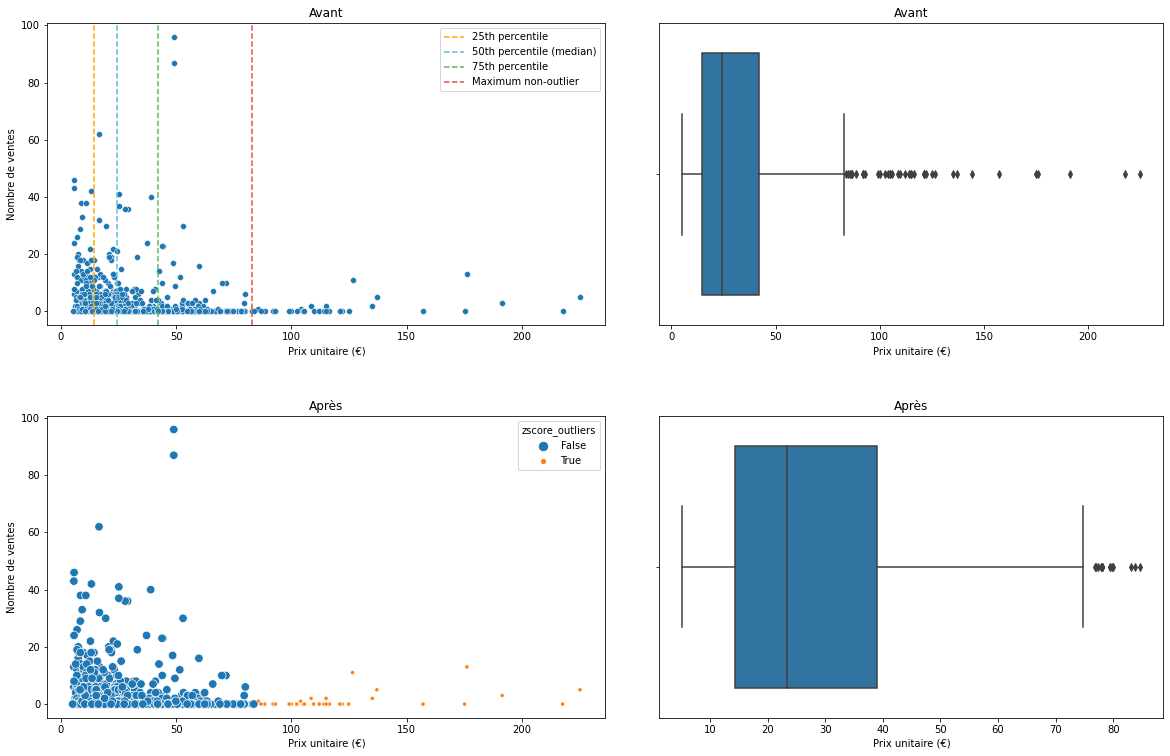

In [45]:
# Graphique zscore
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=5, 
                       figure=fig, 
                       width_ratios= [1, 1, 1, 1, 2],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)

# Figure 1
ax1 = fig.add_subplot(gs[0:1, 0:3])
sns.scatterplot(data=df_merge, x="price", y="total_sales")
plt.title('Avant')
plt.xlabel("Prix unitaire (€)")
plt.ylabel("Nombre de ventes")
p75 = get_percentile(df_iqr, 75)
p50 = get_percentile(df_iqr, 50)
p25 = get_percentile(df_iqr, 25)

# Lignes verticales pour chaque centile d'intérêt
plt.axvline(p25, linestyle='--', color='#ffa700', label='25th percentile')
plt.axvline(p50, linestyle='--', color='#5bc0de', label='50th percentile (median)')
plt.axvline(p75, linestyle='--', color='#5cb85c', label='75th percentile')

# Valeur maximale non aberrante
maxval = p75 + 1.5*iqr
plt.axvline(maxval, linestyle='--', color='#d9534f', label='Maximum non-outlier')

plt.legend(loc='best')

# Figure 2
ax2 = fig.add_subplot(gs[0:1, 3:])
sns.boxplot(x=df_merge['price'])
plt.title('Avant')
plt.xlabel("Prix unitaire (€)")

# Figure 3
ax3 = fig.add_subplot(gs[1:2, 0:3])
sns.scatterplot(data=df_zscore, x="price", y="total_sales", hue="zscore_outliers",
                size="zscore_outliers", legend="full")
plt.title('Après')
plt.xlabel("Prix unitaire (€)")
plt.ylabel("Nombre de ventes")

# Figure 4
ax4 = fig.add_subplot(gs[1:2, 3:])
sns.boxplot(x=no_outliers_zscore['price'])
plt.title('Après')
plt.xlabel("Prix unitaire (€)")

# Affichage graphique
plt.show()

------------
<p style="text-align: center;"><span style="font-family:'Arial Black', Gadget, sans-serif;"><span style="font-size:18px;">Fin du document </span>

------------